![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
44389,id_1292,Budapest,NaN,1293.0,NaN,9.0,[['Surprising for a buffet stalen eating plac....,/Restaurant_Review-g274887-d7250321-Reviews-Ki...,d7250321,1,4.0
7152,id_7152,Brussels,['Mexican'],2987.0,$$ - $$$,7.0,"[['Worst service ever in Brussels', 'This food...",/Restaurant_Review-g188644-d12102435-Reviews-L...,d12102435,0,0.0
46956,id_2428,Munich,['German'],2445.0,NaN,8.0,"[['Usually great - not today', 'Really good mu...",/Restaurant_Review-g187309-d966468-Reviews-Alf...,d966468,1,4.0
41722,id_12152,Paris,"['Italian', 'Pizza', 'Fast Food']",12154.0,NaN,5.0,"[['Good for snacks', 'Fab fast food!!!!!!'], [...",/Restaurant_Review-g187147-d9569030-Reviews-To...,d9569030,1,4.0
46300,id_73,Vienna,"['Grill', 'Israeli', 'Vegetarian Friendly', 'V...",74.0,$$ - $$$,317.0,"[['Amazing food, awesome atmosphere', 'Warm we...",/Restaurant_Review-g190454-d9590751-Reviews-Mi...,d9590751,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
data['Number of ReviewsNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Cuisine StyleNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [16]:
data['Number of ReviewsNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number of ReviewsNAN, Length: 50000, dtype: uint8

#### Посмотрим самое часто встреющееся количество отзывов для дальнейшего заполнения пропусков

In [17]:
data['Number of Reviews'].value_counts()

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1573, dtype: int64

In [18]:
data['Number of Reviews'].mode()

0    2.0
dtype: float64

In [19]:
# Далее заполняем пропуски значением '2'
data['Number of Reviews'] = data['Number of Reviews'].fillna(
    data['Number of Reviews'].mode().iloc[0])

In [20]:
data.sample(20)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine Style_isNAN,Price Range_isNAN,Number of ReviewsNAN,Cuisine StyleNAN
30054,id_1472,Zurich,NaN,1476.0,NaN,2.0,"[['Small cafe at Schmiede-Wiedikon'], ['10/21/...",/Restaurant_Review-g188113-d13000895-Reviews-D...,d13000895,1,3.0,1,1,1,1
39699,id_1004,Hamburg,NaN,1006.0,NaN,83.0,"[['Typical dinner experience', 'Delicious!'], ...",/Restaurant_Review-g187331-d1963482-Reviews-Ko...,d1963482,1,3.5,1,1,0,1
4410,id_4410,Milan,['Italian'],4586.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d4232505-Reviews-Ba...,d4232505,0,0.0,0,1,0,0
31640,id_69,Budapest,"['Mediterranean', 'Italian', 'Pizza', 'Europea...",70.0,$$ - $$$,206.0,"[['Best italian in town', 'Amazing Italian Chr...",/Restaurant_Review-g274887-d10252381-Reviews-G...,d10252381,1,4.5,0,0,0,0
9459,id_9459,Stockholm,"['Italian', 'Pizza', 'European', 'Vegetarian F...",403.0,$$ - $$$,48.0,"[['Short break to Stockholm', 'Great value and...",/Restaurant_Review-g189852-d3515325-Reviews-FE...,d3515325,0,0.0,0,0,0,0
33076,id_1478,Hamburg,"['Brazilian', 'South American']",1480.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187331-d2515817-Reviews-Me...,d2515817,1,4.5,0,1,0,0
49915,id_3792,Rome,"['Italian', 'Mediterranean', 'Seafood']",3793.0,$$ - $$$,333.0,"[['Simpel but great', 'Good sicilian fresh foo...",/Restaurant_Review-g187791-d2697196-Reviews-Ri...,d2697196,1,4.0,0,0,0,0
11076,id_4369,Rome,NaN,4370.0,NaN,17.0,"[[], []]",/Restaurant_Review-g187791-d9750236-Reviews-La...,d9750236,1,4.0,1,1,0,1
4524,id_4524,Lisbon,"['European', 'Mediterranean', 'Portuguese', 'V...",1406.0,$$ - $$$,52.0,"[['Great breakfast', 'What a surprise!'], ['10...",/Restaurant_Review-g189158-d2616941-Reviews-Sa...,d2616941,0,0.0,0,0,0,0
18535,id_1353,Zurich,NaN,1358.0,NaN,5.0,"[['Warm and disorganised', 'Houdini Cinema Bar...",/Restaurant_Review-g188113-d11957461-Reviews-H...,d11957461,1,3.5,1,1,0,1


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [21]:
data.nunique(dropna=False)

Restaurant_id           13094
City                       31
Cuisine Style           10732
Ranking                 12975
Price Range                 4
Number of Reviews        1573
Reviews                 41858
URL_TA                  49963
ID_TA                   49963
sample                      2
Rating                     10
Cuisine Style_isNAN         2
Price Range_isNAN           2
Number of ReviewsNAN        2
Cuisine StyleNAN            2
dtype: int64

In [22]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine Style_isNAN,Price Range_isNAN,Number of ReviewsNAN,Cuisine StyleNAN
40410,id_192,Lisbon,"['Mediterranean', 'European', 'Portuguese', 'V...",193.0,$,163.0,"[['Simple but very good', 'Excellent'], ['01/0...",/Restaurant_Review-g189158-d8630662-Reviews-O_...,d8630662,1,4.5,0,0,0,0
48642,id_5654,London,"['Wine Bar', 'Italian', 'Mediterranean']",5663.0,$$ - $$$,28.0,"[['Probably the best wine bar in London', 'Gre...",/Restaurant_Review-g186338-d7619687-Reviews-Vi...,d7619687,1,4.5,0,0,0,0
32568,id_1561,Athens,['Pizza'],1563.0,$,7.0,"[['Quick, inexpensive stop for pizza & drinks'...",/Restaurant_Review-g189400-d5600596-Reviews-Fo...,d5600596,1,3.5,0,0,0,0
37749,id_9212,Paris,['Thai'],9214.0,$$ - $$$,59.0,"[['Thaifood', 'Nice little restaurant'], ['07/...",/Restaurant_Review-g187147-d1322442-Reviews-Lu...,d1322442,1,3.5,0,0,0,0
24986,id_13336,London,NaN,13346.0,NaN,5.0,"[['Typical EAT', 'Good restaurant Eat'], ['10/...",/Restaurant_Review-g186338-d8460601-Reviews-Ea...,d8460601,1,3.0,1,1,0,1


#### Возьмем признак "Price Range".

In [23]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  

In [24]:
data['Price Range'] = data['Price Range'].apply(
    lambda x: 1 if x == '$' else 2 if x == '$$ - $$$' else 3 if x == '$$$$' else 2)

### Добавим дополнительную информацию в наш датасет:
* количество туристов в городе 
* средняя зарплата в городе
* численность населения города

In [25]:
# добавляем информацию по населению городу в млн чел
population = {
    'London': 8.98,
    'Paris': 2.48,
    'Madrid': 6.64,
    'Barcelona': 5.58,
    'Berlin': 3.77,
    'Milan': 1.35,
    'Rome': 2.87,
    'Prague': 1.3,
    'Lisbon': 0.5,
    'Vienna': 1.9,
    'Amsterdam': 0.8,
    'Brussels': 0.174,
    'Hamburg': 1.9,
    'Munich': 1.472,
    'Lyon': 0.5,
    'Stockholm': 1,
    'Budapest': 1.752,
    'Warsaw': 1.708,
    'Dublin': 1.388,
    'Copenhagen': 0.6,
    'Athens': 0.66,
    'Edinburgh': 0.5,
    'Zurich': 0.4,
    'Oporto': 0.2,
    'Geneva': 0.5,
    'Krakow': 0.8,
    'Oslo': 0.681,
    'Helsinki': 0.631,
    'Bratislava': 0.424,
    'Luxembourg': 0.613,
    'Ljubljana': 0.279
}

In [26]:
# добавляем информацию по зарплатам в EUR
salary = {
    'London': 2460,
    'Paris': 3617,
    'Madrid': 3000,
    'Barcelona': 2700,
    'Berlin': 3944,
    'Milan': 2500,
    'Rome': 1846,
    'Prague': 1400,
    'Lisbon': 860,
    'Vienna': 3406,
    'Amsterdam': 2855,
    'Brussels': 3000,
    'Hamburg': 3296,
    'Munich': 3566,
    'Lyon': 3455,
    'Stockholm': 2700,
    'Budapest': 750,
    'Warsaw': 900,
    'Dublin': 2500,
    'Copenhagen': 2700,
    'Athens': 1938,
    'Edinburgh': 3000,
    'Zurich': 4000,
    'Oporto': 1901,
    'Geneva': 6388,
    'Krakow': 1652,
    'Oslo': 2916,
    'Helsinki': 2500,
    'Bratislava': 1932,
    'Luxembourg': 4000,
    'Ljubljana': 1100
}


In [27]:
# добавляем информацию по кол-ву туристов в млн чел
tourists = {
    'London': 21.7,
    'Paris': 50,
    'Madrid': 7.6,
    'Barcelona': 32,
    'Berlin': 13.4,
    'Milan': 11,
    'Rome': 42,
    'Prague': 6.67,
    'Lisbon': 7,
    'Vienna': 7,
    'Amsterdam': 10,
    'Brussels': 8.5,
    'Hamburg': 5,
    'Munich': 2.5,
    'Lyon': 5,
    'Stockholm': 1.8,
    'Budapest': 2.8,
    'Warsaw': 25,
    'Dublin': 10.6,
    'Copenhagen': 8.8,
    'Athens': 5.7,
    'Edinburgh': 3,
    'Zurich': 10,
    'Oporto': 13,
    'Geneva': 5,
    'Krakow': 8.1,
    'Oslo': 5.8,
    'Helsinki': 8.5,
    'Bratislava': 1.4,
    'Luxembourg': 5.6,
    'Ljubljana': 5.9
}

#### Далее добавим нашу дополнительную информацию в датасет

In [28]:
data['tourists'] = data['City'].apply(lambda x: tourists[x])
data['population'] = data['City'].apply(lambda x: population[x])
data['salary'] = data['City'].apply(lambda x: salary[x])

#### Обработаем стоблец с информацией о стиле кухонь: вытащим из него количество кухонь в каждом ресторане

In [29]:
# добавим количество кухонь в каждом ресторане, при отсутствии информации напишем "No information",
# т.е. будем считать, что представлен как минимум один вид

data['Cuisine Style'] = data['Cuisine Style'].fillna('No information]').apply(lambda x: x[x.find(
    '[')+1:x.find(']')].replace("'", '').replace(', ', ',').strip(' ').split(','))

In [30]:
data['Cuisine_count'] = data['Cuisine Style'].apply(lambda x: len(x))

#### Можно заметить, что список кухонь довольно таки велик, поэтому выведем топ упоминаний и сделаем дополнительные переменные на основе этой информации

In [31]:
from collections import Counter

сuisine_count = []
for x in data['Cuisine Style']:
    for i in x:
        сuisine_count.append(i)
Counter(сuisine_count).most_common()[0:7]

[('Vegetarian Friendly', 14021),
 ('European', 12561),
 ('No information', 11590),
 ('Mediterranean', 7820),
 ('Italian', 7433),
 ('Vegan Options', 5684),
 ('Gluten Free Options', 5185)]

#### Создадим новые признаки:
* 1 - если топ кухня есть в ресторане
* 0 - если кухни нет в списке

In [32]:
data['Vegetarian Friendly'] = data['Cuisine Style'].apply(
    lambda x: 1 if 'Vegetarian Friendly' in x else 0)
data['European'] = data['Cuisine Style'].apply(
    lambda x: 1 if 'European' in x else 0)
data['Mediterranean'] = data['Cuisine Style'].apply(
    lambda x: 1 if 'Mediterranean' in x else 0)
data['Italian'] = data['Cuisine Style'].apply(
    lambda x: 1 if 'Italian' in x else 0)
data['Vegan Options'] = data['Cuisine Style'].apply(
    lambda x: 1 if 'Vegan Options' in x else 0)
data['Gluten Free Options'] = data['Cuisine Style'].apply(
    lambda x: 1 if 'Gluten Free Options' in x else 0)

#### Преобразуем стоблец ID_TA в числовой формат (возможно улучшит нашу модель)

In [33]:
data['id_ta'] = data['ID_TA'].apply(lambda x: int(x[x.find('d')+1:]))

#### Далее будем доставать данные о времени из стоблца Reviews:
*  найдем дату первого отзыва
*  найдем дату последнего отзыва
*  найдем разницу в днях между этими отзывами
*  пропуски заполним минимальным значением (для первой даты)
*  максимальным значением (для последней даты)
* добавим день недели последнего отзыва

In [34]:
data['Reviews'].isna().sum()

2

In [35]:
# заполним пропуски модой
data['Reviews'] = data['Reviews'].fillna(
    data['Reviews'].mode().iloc[0])

In [36]:
#ф-ция для обработки времени 
def date_(x):
    if x == '[[], []]':
        return []
    else:
        x = x.replace(']]', '')
        x = x.replace("'", '')
        x = x.split('], [')[1]
        x = x.split(', ')
        return x

In [37]:
# работаем с датой 
data['Reviews_date'] = data['Reviews'].apply(date_)
data['Reviews_date_first'] = data['Reviews_date'].apply(
    lambda x: x[1] if len(x) == 2 else None)
data['Reviews_date_last'] = data['Reviews_date'].apply(
    lambda x: x[0] if len(x) > 0 else None)

# Преобразуем в формат дат
data['Reviews_date_first'] = pd.to_datetime(data['Reviews_date_first'])
data['Reviews_date_last'] = pd.to_datetime(data['Reviews_date_last'])

In [38]:
# заполним пропуски
data['Reviews_date_first'] = data['Reviews_date_first'].fillna(
    data['Reviews_date_first'].min())
data['Reviews_date_last'] = data['Reviews_date_last'].fillna(
    data['Reviews_date_last'].max())

In [39]:
# считаем дельту в днях
data['Delta_days'] = data['Reviews_date_last'] - data['Reviews_date_first']
data['Delta_days'] = data['Delta_days'].apply(lambda x: x.days)

In [40]:
# смотрим день недели последнего отзыва
data['Day_of_week_last_review'] = data['Reviews_date_last'].dt.dayofweek

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Cuisine Style_isNAN        50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
Number of ReviewsNAN       50000 non-null uint8
Cuisine StyleNAN           50000 non-null uint8
tourists                   50000 non-null float64
population                 50000 non-null float64
salary                     50000 non-null int64
Cuisine_cou

In [42]:
#### Стандартизация не привела к улучшению модели
#### upd. позже была найдена информация, что нормализация/стандартизация не влияют на качество данной модели :(

In [43]:
# Стандартизация
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[['population', 'salary', 'tourists', 'Ranking', 'Number of Reviews', 'Cuisine_count',
#    'id_ta', 'Delta_days']] = scaler.fit_transform(df[['population', 'salary', 'tourists', 'Ranking', 'Number of Reviews', 'Cuisine_count',
#                                                       'id_ta', 'Delta_days']])

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

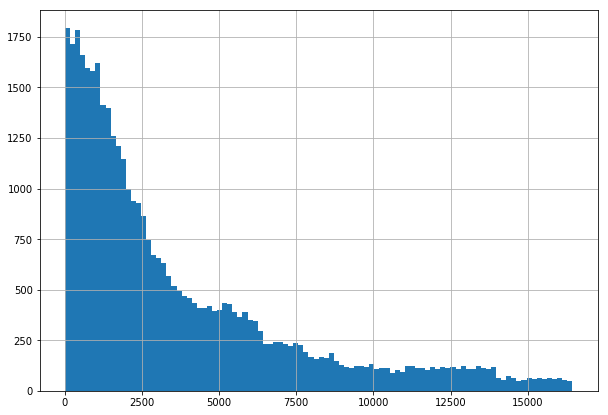

In [44]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

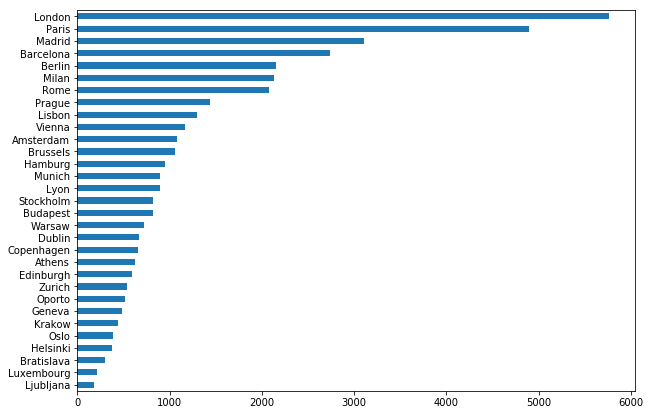

In [45]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

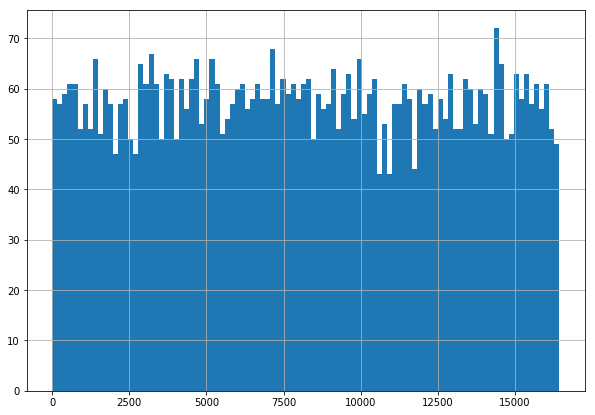

In [46]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

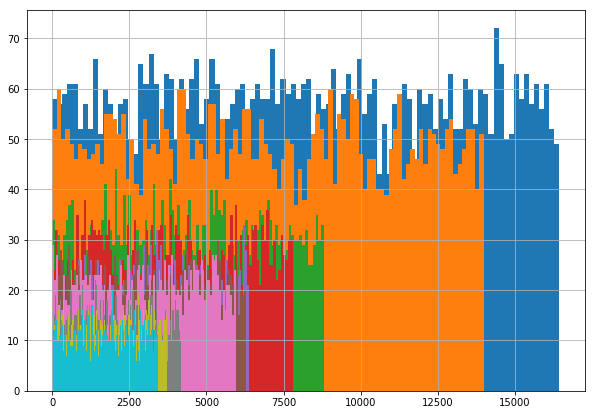

In [47]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

### Посмотрим распределение целевой переменной

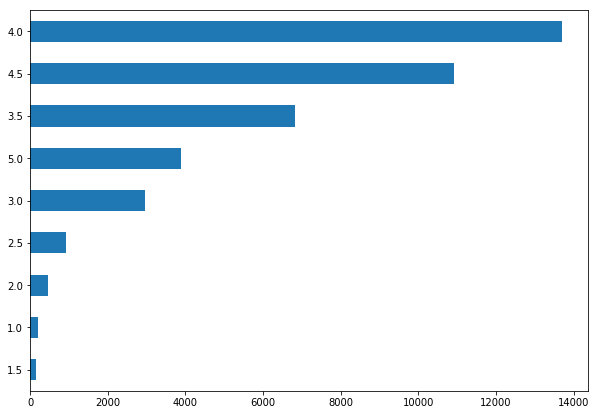

In [48]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

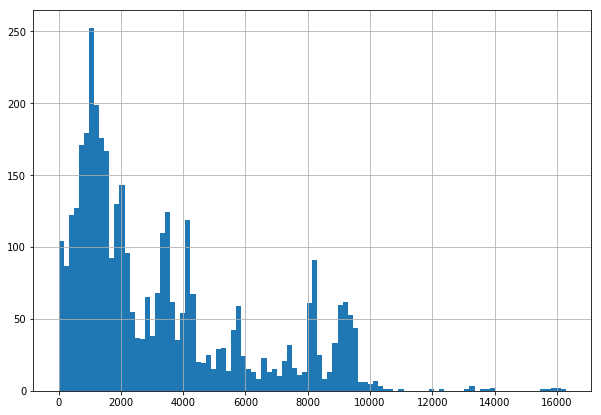

In [49]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

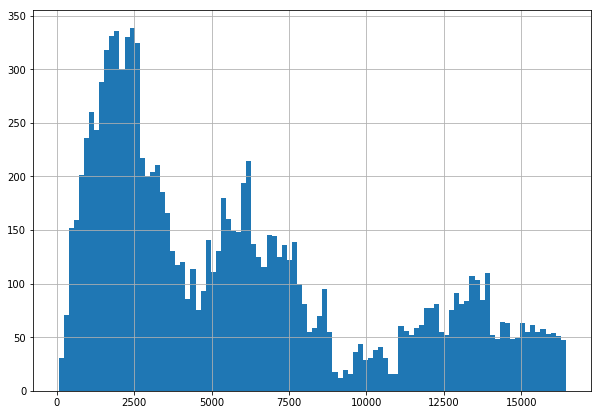

In [50]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

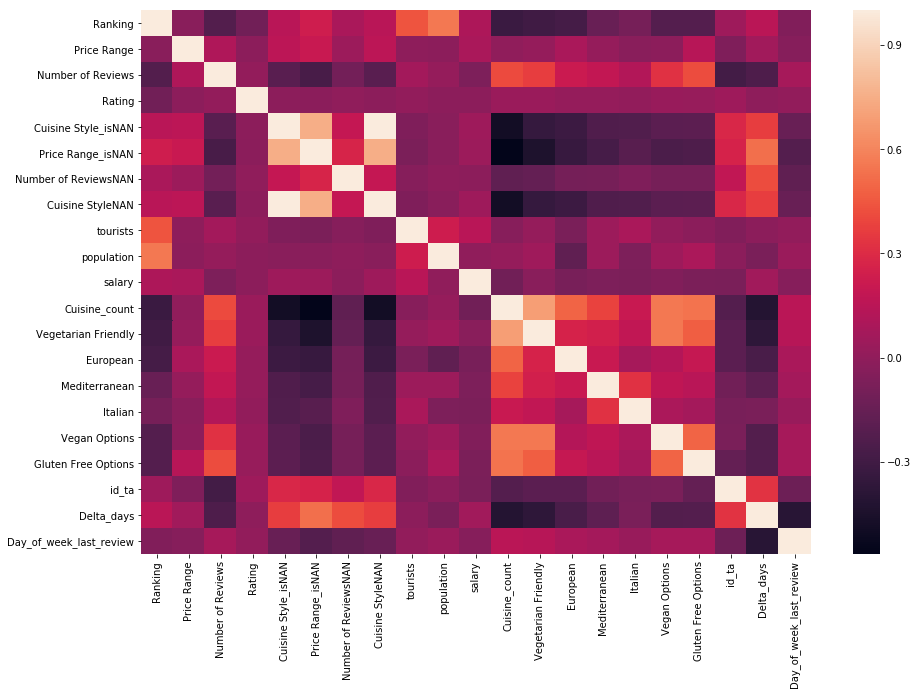

In [51]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Feature Engineering

#### Добавим несколько новых признаков на основе информации, взятой из внешних источников

In [52]:
# количество ресторанов в зависимости от города
rest_count = data['City'].value_counts().to_dict()
data['rest_count'] = data['City'].apply(lambda x: rest_count[x])

In [53]:
# количество ресторанов на одного туриста
data['rest_count_on_one_tourist'] = data['rest_count'] / data['tourists']

In [54]:
# количество отзывов на один ресторан
data['review_on_one_rest'] = data['Number of Reviews'] / data['rest_count']

In [55]:
# количество отзывов в зависимости от кол-ва туристов
data['review_on_one_rest_tour'] = data['Number of Reviews'] / data['tourists']

In [56]:
# ранг делим на кол-во ресторанов (чем выше - тем хуже)
data['Ranking_rest_count'] = data['Ranking'] / data['rest_count']

#### Создадим dummy-переменные для стоблца City

In [57]:
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [58]:
data = data.drop(['Restaurant_id','Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA',
              'Reviews_date', 'Reviews_date_first', 'Reviews_date_last'], axis=1)

In [59]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [60]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [61]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 58), (40000, 58), (40000, 57), (32000, 57), (8000, 57))

# Model 
Сам ML

In [62]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [63]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [64]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [65]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20007187499999998


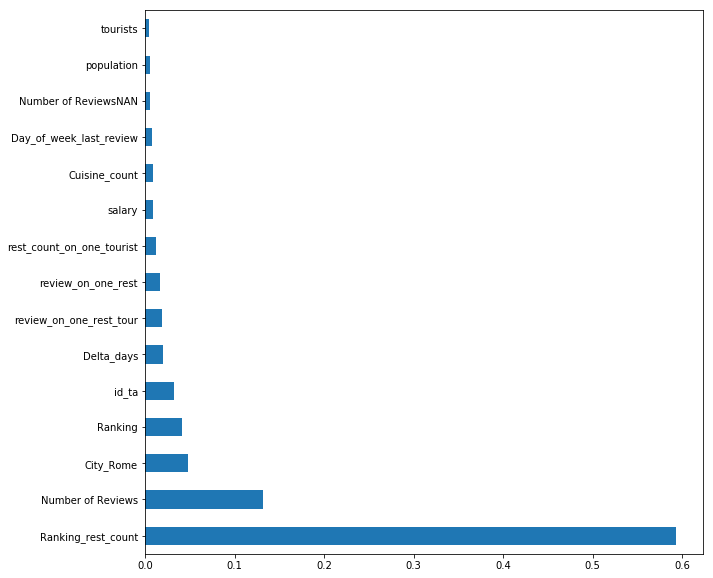

In [66]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [67]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Cuisine Style_isNAN,Price Range_isNAN,Number of ReviewsNAN,Cuisine StyleNAN,tourists,population,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
1159,6321.0,2,38.0,0.0,0,0,0,0,50.0,2.480,...,0,0,1,0,0,0,0,0,0,0
9958,2895.0,2,27.0,0.0,1,1,0,1,13.4,3.770,...,0,0,0,0,0,0,0,0,0,0
7253,4797.0,2,23.0,0.0,0,1,0,0,11.0,1.350,...,0,0,0,0,0,0,0,0,0,0
4104,2140.0,1,174.0,0.0,0,0,0,0,42.0,2.870,...,0,0,0,0,1,0,0,0,0,0
2713,1703.0,2,35.0,0.0,1,1,0,1,5.0,0.500,...,0,0,0,0,0,0,0,0,0,0
895,6342.0,2,2.0,0.0,1,1,1,1,13.4,3.770,...,0,0,0,0,0,0,0,0,0,0
7989,4385.0,2,5.0,0.0,0,1,0,0,13.4,3.770,...,0,0,0,0,0,0,0,0,0,0
4114,420.0,1,617.0,0.0,0,0,0,0,2.8,1.752,...,0,0,0,0,0,0,0,0,0,0
9178,11443.0,2,29.0,0.0,0,0,0,0,50.0,2.480,...,0,0,1,0,0,0,0,0,0,0
79,13175.0,2,3.0,0.0,1,1,0,1,50.0,2.480,...,0,0,1,0,0,0,0,0,0,0


In [68]:
test_data = test_data.drop(['Rating'], axis=1)

In [69]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [70]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [71]:
predict_submission

array([3.155, 4.28 , 4.235, ..., 3.015, 4.475, 4.22 ])

In [72]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.155
1,id_1,4.280
2,id_2,4.235
3,id_3,4.390
4,id_4,4.420
5,id_5,4.525
6,id_6,2.780
7,id_7,2.265
8,id_8,4.120
9,id_9,4.540
